In [9]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


<Figure size 432x288 with 0 Axes>

In [10]:
#Let's try to find average colony fitness over many sugars:
sugars_arr = np.logspace(np.log10(60),np.log10(430),num=4)
g_opt_arr = np.zeros_like(sugars_arr)

for sug_idx in range(len(sugars_arr)):
    g_opt_arr[sug_idx] = g[np.argmax(fitness(g,sugars_arr[sug_idx],delta))]
    
#Entropy of sugars:
p_sug = np.ones_like(sugars_arr)
p_sug = p_sug/np.sum(p_sug)

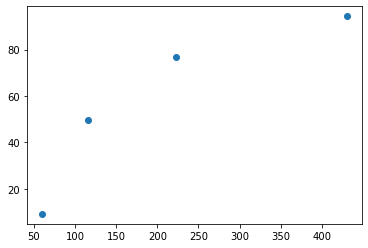

In [11]:
plt.scatter(sugars_arr,g_opt_arr)

In [19]:
alpha=0.5

#Now the unregulated dist:
p0_unreg_sug = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg_sug = p0_unreg_sug/np.trapz(p0_unreg_sug,dx=dg)

#The regulated distributions:
p0_reg_sug = np.zeros((len(g_opt_arr),len(g)))

for g_opt_idx in range(len(g_opt_arr)):
    p0_reg_sug[g_opt_idx] = Gaussian(g,g_opt_arr[g_opt_idx],np.maximum(np.sqrt(alpha*g_opt_arr[g_opt_idx]),1))
    p0_reg_sug[g_opt_idx] = p0_reg_sug[g_opt_idx]/np.trapz(p0_reg_sug[g_opt_idx],dx=dg)

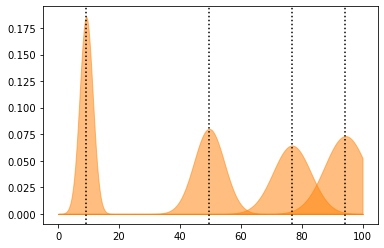

In [20]:
#Plotting the regulated distributions and the optimal g for each sugar:
for g_opt_idx in range(len(g_opt_arr)):
    plt.fill_between(g,p0_reg_sug[g_opt_idx],color=CB_colors[1],alpha=0.5)
    plt.axvline(x=g_opt_arr[g_opt_idx],color='k',ls=':')
    

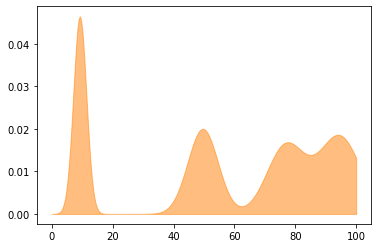

In [21]:
#First, total regulated distribution of g:
marg_p0_reg = np.average(p0_reg_sug,axis=0,weights=p_sug)
plt.fill_between(g,marg_p0_reg,color=CB_colors[1],alpha=0.5)

In [22]:
cont_entropy(marg_p0_reg)

5.926993203407425

In [23]:
cond_ent_g_s = 0
for sug_idx in range(len(sugars_arr)):
    cond_ent_g_s = cond_ent_g_s + (p_sug[sug_idx]*cont_entropy(p0_reg_sug[sug_idx]))

print(cond_ent_g_s)

                                   

4.117026883102479


In [24]:
cont_entropy(marg_p0_reg) - cond_ent_g_s

1.8099663203049454

In [18]:
alpha

1